Importing modules

In [1]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import corner

Create data files with data and the headings

In [2]:
data = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", skiprows = 2, delimiter = ",")

In [3]:
names = numpy.loadtxt("Skyserver_Spectro2_13_2018 10_41_13 PM.csv", dtype=str, skiprows = 1, delimiter = ",")[0]

Convert the text files into a dataframe

In [4]:
original_df = pd.read_csv("/Users/marin/machine/redshift_data_project/Skyserver_Spectro2_13_2018 10_41_13 PM.csv", \
                 delimiter = ",", skiprows=1)
original_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out values where i = -9999.0, z = -9999.0, and redshift = 0.00

In [5]:
df_filtered = original_df[(original_df['i'] != -9999.0) & (original_df['z'] != -9999.0) & (original_df['redshift'] != 0.00)]
df_filtered.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out values where redshift < 0.01, because there are a lot of filler values at 0.01 for some reason

In [6]:
final_df = df_filtered[(df_filtered['redshift'] > 0.01)]
final_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Filters out outliers from final_df

In [7]:
no_outliers_df = final_df[numpy.abs(final_df['redshift']-final_df['redshift'].mean())\
                             <=(3*final_df['redshift'].std())]
no_outliers_df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281


Creates a new dataframe with four new columns. Each column takes the difference between adjacent columns.

In [8]:
d= {'u-g': no_outliers_df['u'] - no_outliers_df['g'],
    'g-r': no_outliers_df['g'] - no_outliers_df['r'],
    'r-i': no_outliers_df['r'] - no_outliers_df['i'],
    'i-z': no_outliers_df['i'] - no_outliers_df['z'], 
   }
add_columns_df = pd.DataFrame(d)
add_columns_df.head()

df = pd.concat([no_outliers_df, add_columns_df], axis = 1)

df = df[(df['r'] < 25) & (df['r-i'] > -1) & (df['i-z'] < 2) & (df['i-z'] > -0.5)]
df.head()

,objid,ra,dec,u,g,r,i,z,redshift,specobjid,plate,mjd,fiberid,g-r,i-z,r-i,u-g
0,1237645879551000764,348.841087,1.268802,25.92735,20.99570,19.24612,18.56461,18.43049,0.399651,4825695603672457216,4286,55499,322,1.74958,0.13412,0.68151,4.93165
1,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,0.032125,430194949951088640,382,51816,368,0.65768,0.29902,0.37921,1.14409
2,1237645879562928144,16.004912,1.259423,21.50923,19.69340,18.47973,17.91998,17.55132,0.312048,754455784200366080,670,52520,374,1.21367,0.36866,0.55975,1.81583
3,1237645879562928258,16.020244,1.267667,20.96947,20.29136,19.36779,18.86387,18.45551,0.200468,754453860055017472,670,52520,367,0.92357,0.40836,0.50392,0.67811
4,1237645879562928805,16.026029,1.266772,25.27165,22.32081,21.33033,19.94852,19.47201,0.752645,4853831831466778624,4311,55506,281,0.99048,0.47651,1.38181,2.95084


Creates x, a dataframe with the columns of magnitude differences and one column of magnitudes (in this case it was u, but it could be anything). Also creates y, which is the redshift column

In [9]:
y = df['redshift']
x = df.iloc[:,[3, 13, 14, 15, 16]]
x.head()

,u,g-r,i-z,r-i,u-g
0,25.92735,1.74958,0.13412,0.68151,4.93165
1,19.38905,0.65768,0.29902,0.37921,1.14409
2,21.50923,1.21367,0.36866,0.55975,1.81583
3,20.96947,0.92357,0.40836,0.50392,0.67811
4,25.27165,0.99048,0.47651,1.38181,2.95084


In [10]:
x.shape

(865, 5)

Defines a manual linear regression function.

In [11]:
def dumb_linreg(x, coef, intercept):
    return x * coef + intercept

Defines a function which returns 50 floats between the minimum and maximum of a column

In [12]:
def x_for_plotting(dataframe, column):
    out = numpy.linspace(min(dataframe[column]), max(dataframe[column]), 50)
    return(out)

Defines a chi square error function.

In [13]:
def chi_square_error(observed_y, predicted_y):
    error = 0
    observed_y_list = observed_y.tolist()
    predicted_y_list = predicted_y.tolist()
    for i in predicted_y_list:
        error += ((observed_y_list[predicted_y_list.index(i)] - i)**2)/numpy.var(predicted_y)**2
    print(error)

In [14]:
nm_df = x.loc[:, 'u-g':'i-z']

In [15]:
def y_for_graph(coef,x, i):
    return np.dot(coef[i+1], x)

In [16]:
nc_x = df.iloc[:,3:8]
nc_x.head()

,u,g,r,i,z
0,25.92735,20.99570,19.24612,18.56461,18.43049
1,19.38905,18.24496,17.58728,17.20807,16.90905
2,21.50923,19.69340,18.47973,17.91998,17.55132
3,20.96947,20.29136,19.36779,18.86387,18.45551
4,25.27165,22.32081,21.33033,19.94852,19.47201


In [17]:
nc_y = pd.concat([y]*5, axis=1)
nc_y.head()

,redshift,redshift,redshift,redshift,redshift
0,0.399651,0.399651,0.399651,0.399651,0.399651
1,0.032125,0.032125,0.032125,0.032125,0.032125
2,0.312048,0.312048,0.312048,0.312048,0.312048
3,0.200468,0.200468,0.200468,0.200468,0.200468
4,0.752645,0.752645,0.752645,0.752645,0.752645


# Debugging Plots

a vs d

Text(0,0.5,'i-z')

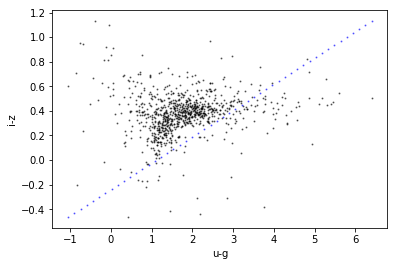

In [18]:
plt.scatter(x['u-g'], x['i-z'], color='black', s=1, alpha=0.5)
plt.scatter(x_for_plotting(x, 'u-g'), x_for_plotting(x, 'i-z'), color='blue', s=1, alpha=0.5)
plt.xlabel('u-g')
plt.ylabel('i-z')

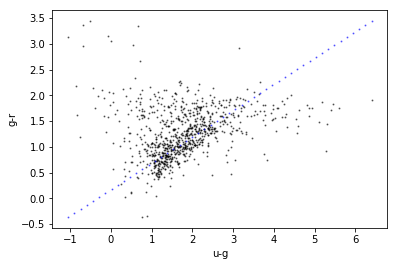

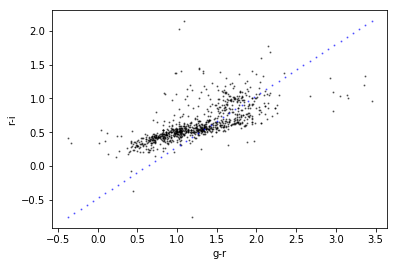

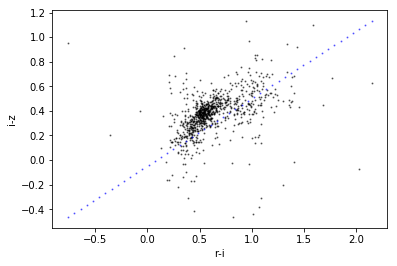

In [19]:
ls = ['u-g', 'g-r', 'r-i', 'i-z']
for i in range(len(ls[:-1])):
    name = ls[i]
    name_2 = ls[i+1]
    plt.scatter(x[name], x[name_2], color='black', s=1, alpha=0.5)
    plt.scatter(x_for_plotting(x, name), x_for_plotting(x, name_2), color='blue', s=1, alpha=0.5)
    plt.xlabel(name)
    plt.ylabel(name_2)
    plt.show()

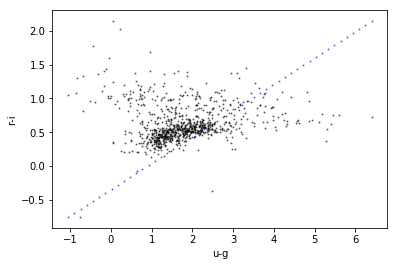

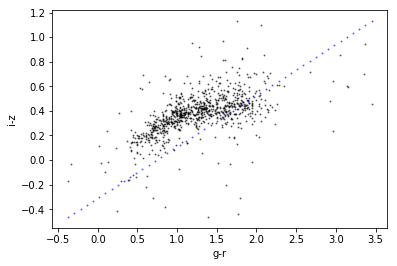

In [20]:
for i in range(len(ls[1:-1])):
    name = ls[i]
    name_2 = ls[1:][i+1]
    plt.scatter(x[name], x[name_2], color='black', s=1, alpha=0.5)
    plt.scatter(x_for_plotting(x, name), x_for_plotting(x, name_2), color='blue', s=1, alpha=0.5)
    plt.xlabel(name)
    plt.ylabel(name_2)
    plt.show()

# Why The Algorithm Doesn't Work

$y_o$ = observed y values
$y_p$ = predicted y values

$y = mx + b$ is an equation where y and b are scalars, and m and x are vectors.

Function $f$ $\exists$ where $x_2 = f(x_1)$ 

Function $g$ $\exists$ where $x_3 = g(x_2)$

Our equation is
$y = m \cdot \begin{bmatrix}x_1,  f(x_1),  g(f(x_1))\end{bmatrix} + b$

The equations we want to solve are as follows:
$y_p - m_1 \cdot x_1 + b$ 
$y_p - m_2 \cdot f(x_1) + b$
$y_p - m_3 \cdot g(f(x_1)) + b$

But when multiplying
$y = \begin{bmatrix} m_1, m_2, m_3\end{bmatrix} \cdot \begin{bmatrix} x_1, x_2, x_3\end{bmatrix}$

we instead got
$y_p = m_1 \cdot x_1 + m_2 \cdot x_2 + m_3 \cdot x_3 + b$

Since the two results aren't the same, the lines look really strange.

$x_{o,n}$ = observed x values
$x_{p,n}$ = x values for plotting

Relationships between $x_1, x_2, x_3$:

$x_{p,2} = 0.55915161 \cdot x_{p,1}$

$x_{p,3} = 0.52240939 \cdot x_{p,2}$

$x_{o,2} = 0.48012458 \cdot x_{o,1}$

$x_{o,3} = 0.54765443 \cdot x_{o,2}$

$x_{o,4} = 4.00706762 \cdot x_{o,3}$

# Calculations for Desired Equations



Set of slopes ($m_n$): $[0.40333345,  0.04263828, -0.0342513,  0.00849987]$

Intercept ($b$): 0.058753418732004334

$x_{p,1}$

In [21]:
x_for_plotting(x, 'u-g')

array([-1.04976   , -0.89782571, -0.74589143, -0.59395714, -0.44202286,
       -0.29008857, -0.13815429,  0.01378   ,  0.16571429,  0.31764857,
        0.46958286,  0.62151714,  0.77345143,  0.92538571,  1.07732   ,
        1.22925429,  1.38118857,  1.53312286,  1.68505714,  1.83699143,
        1.98892571,  2.14086   ,  2.29279429,  2.44472857,  2.59666286,
        2.74859714,  2.90053143,  3.05246571,  3.2044    ,  3.35633429,
        3.50826857,  3.66020286,  3.81213714,  3.96407143,  4.11600571,
        4.26794   ,  4.41987429,  4.57180857,  4.72374286,  4.87567714,
        5.02761143,  5.17954571,  5.33148   ,  5.48341429,  5.63534857,
        5.78728286,  5.93921714,  6.09115143,  6.24308571,  6.39502   ])

$x_{p,2}$ = $f(x_1)$

In [22]:
x_for_plotting(x, 'u-g')

array([-1.04976   , -0.89782571, -0.74589143, -0.59395714, -0.44202286,
       -0.29008857, -0.13815429,  0.01378   ,  0.16571429,  0.31764857,
        0.46958286,  0.62151714,  0.77345143,  0.92538571,  1.07732   ,
        1.22925429,  1.38118857,  1.53312286,  1.68505714,  1.83699143,
        1.98892571,  2.14086   ,  2.29279429,  2.44472857,  2.59666286,
        2.74859714,  2.90053143,  3.05246571,  3.2044    ,  3.35633429,
        3.50826857,  3.66020286,  3.81213714,  3.96407143,  4.11600571,
        4.26794   ,  4.41987429,  4.57180857,  4.72374286,  4.87567714,
        5.02761143,  5.17954571,  5.33148   ,  5.48341429,  5.63534857,
        5.78728286,  5.93921714,  6.09115143,  6.24308571,  6.39502   ])

$y_p = m_1 \cdot x_{p,1} + b$

In [23]:
np.dot(0.40333345, x_for_plotting(x, 'u-g')) + 0.058753418732004334

array([-0.3646499 , -0.30336972, -0.24208954, -0.18080936, -0.11952919,
       -0.05824901,  0.00303117,  0.06431135,  0.12559153,  0.18687171,
        0.24815189,  0.30943207,  0.37071225,  0.43199243,  0.49327261,
        0.55455279,  0.61583297,  0.67711315,  0.73839333,  0.79967351,
        0.86095369,  0.92223387,  0.98351405,  1.04479423,  1.10607441,
        1.16735459,  1.22863477,  1.28991495,  1.35119513,  1.41247531,
        1.47375549,  1.53503566,  1.59631584,  1.65759602,  1.7188762 ,
        1.78015638,  1.84143656,  1.90271674,  1.96399692,  2.0252771 ,
        2.08655728,  2.14783746,  2.20911764,  2.27039782,  2.331678  ,
        2.39295818,  2.45423836,  2.51551854,  2.57679872,  2.6380789 ])

$y_p = m_2 \cdot x_{p,2} + b $

$y_p = m_2 \cdot f(x_{p,1}) + b $

In [24]:
np.dot(0.04263828, x_for_plotting(x, 'u-g') * 0.55915161) + 0.058753418732004334

array([0.03372581, 0.03734812, 0.04097043, 0.04459273, 0.04821504,
       0.05183734, 0.05545965, 0.05908195, 0.06270426, 0.06632656,
       0.06994887, 0.07357117, 0.07719348, 0.08081578, 0.08443809,
       0.08806039, 0.0916827 , 0.095305  , 0.09892731, 0.10254961,
       0.10617192, 0.10979422, 0.11341653, 0.11703884, 0.12066114,
       0.12428345, 0.12790575, 0.13152806, 0.13515036, 0.13877267,
       0.14239497, 0.14601728, 0.14963958, 0.15326189, 0.15688419,
       0.1605065 , 0.1641288 , 0.16775111, 0.17137341, 0.17499572,
       0.17861802, 0.18224033, 0.18586264, 0.18948494, 0.19310725,
       0.19672955, 0.20035186, 0.20397416, 0.20759647, 0.21121877])

$y_p = m_3 \cdot x_{p,3} + b $ 

$y_p = m_3 \cdot g(f(x_{p,1})) + b $

In [25]:
np.dot(-0.0342513, 0.52240939 * (0.55915161 * x_for_plotting(x, 'u-g'))) + 0.058753418732004334

array([ 0.06925628,  0.06773618,  0.06621607,  0.06469597,  0.06317586,
        0.06165576,  0.06013565,  0.05861555,  0.05709545,  0.05557534,
        0.05405524,  0.05253513,  0.05101503,  0.04949492,  0.04797482,
        0.04645471,  0.04493461,  0.04341451,  0.0418944 ,  0.0403743 ,
        0.03885419,  0.03733409,  0.03581398,  0.03429388,  0.03277378,
        0.03125367,  0.02973357,  0.02821346,  0.02669336,  0.02517325,
        0.02365315,  0.02213305,  0.02061294,  0.01909284,  0.01757273,
        0.01605263,  0.01453252,  0.01301242,  0.01149231,  0.00997221,
        0.00845211,  0.006932  ,  0.0054119 ,  0.00389179,  0.00237169,
        0.00085158, -0.00066852, -0.00218862, -0.00370873, -0.00522883])

Equation for $y_p = m_1 \cdot x_1 + m_2 \cdot x_2 + m_3 \cdot x_3 + b$ using actual values for plotting

In [26]:
y_p1 = 0.40333345 * x_for_plotting(x, 'u-g') + 0.04263828 * x_for_plotting(x, 'g-r') \
-0.0342513 * x_for_plotting(x, 'r-i') + 0.058753418732004334 

Equation for $y_p = m_1 \cdot x_1 + m_2 \cdot x_2 + m_3 \cdot x_3 + b$ using $f(x_1)$ and $g(f(x_1))$

In [27]:
y_p2 = 0.40333345 * x_for_plotting(x, 'u-g') + 0.04263828 * (0.55915161 * x_for_plotting(x, 'u-g')) + \
(0.52240939 * (0.55915161 * x_for_plotting(x, 'u-g'))) + 0.058753418732004334 

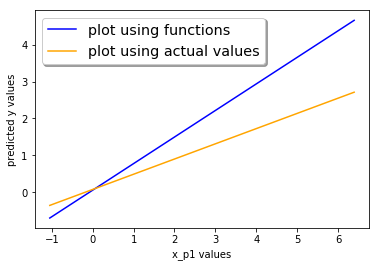

In [28]:
plt.plot(x_for_plotting(x, 'u-g'), y_p2, color='blue', label='plot using functions')
plt.plot(x_for_plotting(x, 'u-g'), y_p1, color='orange', label='plot using actual values')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel('x_p1 values')
plt.ylabel('predicted y values')
plt.show()

# Different Algorithms

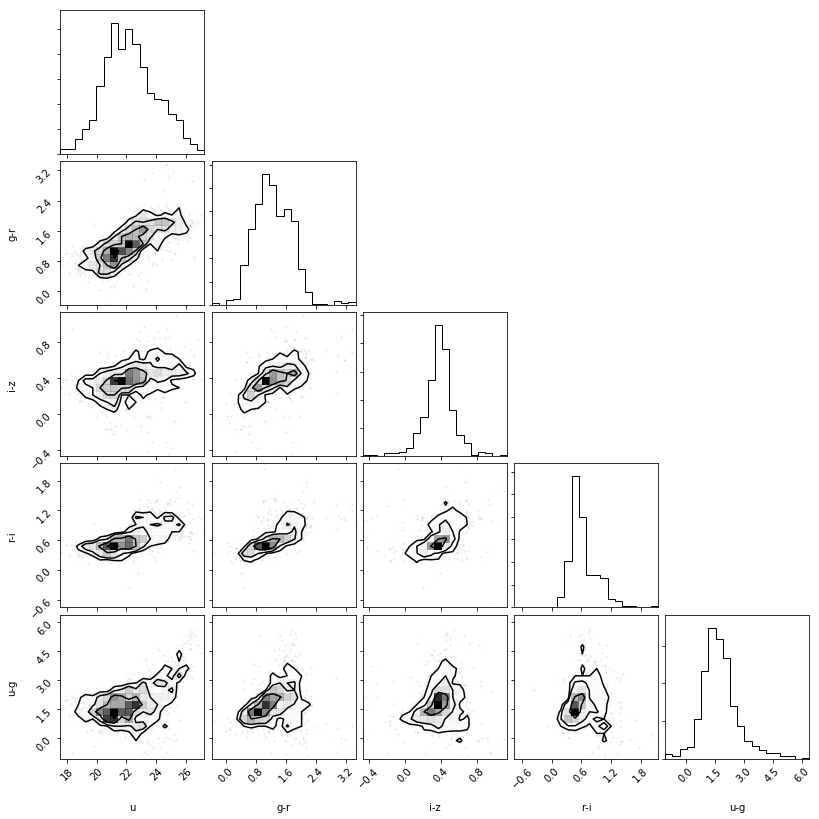

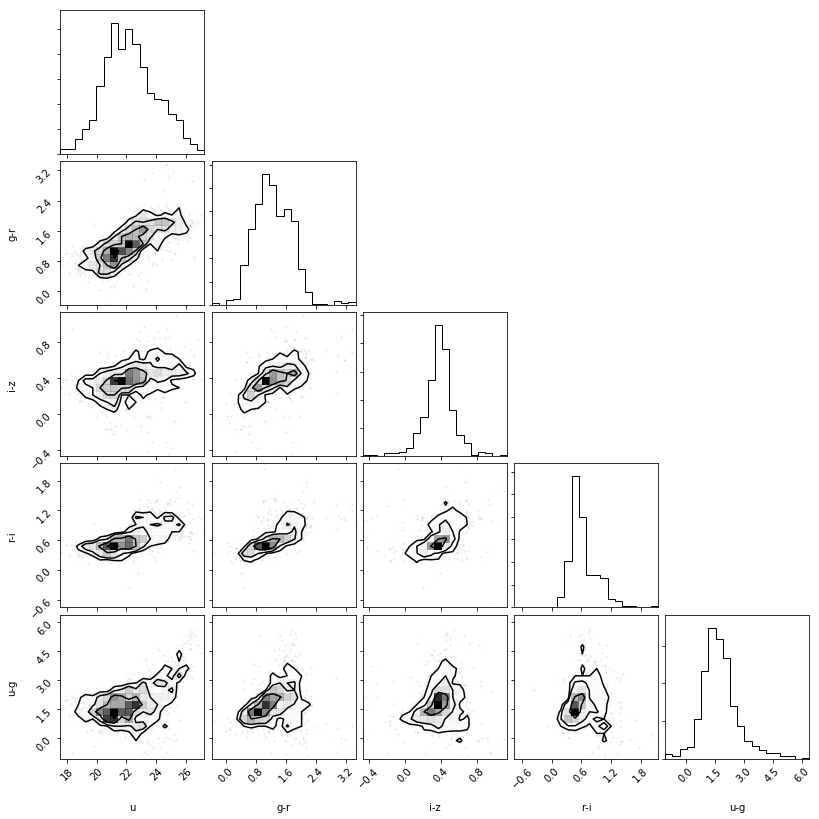

In [32]:
corner.corner(x)